# Task 1.1

?? Why not use l2 norm???
Search up when and when not to use l2 norm i guess?

In [91]:
import numpy as np
from scipy import stats


TC = np.zeros((240, 6))
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration = [15,20,25,15,20,25]

# Keep track how long 1 has been 'on' for and turn change to 0 after 
# specified duration. Turn it back on when end of interval reached
for j in range(0, 6):
    flag = 1
    on_count = 0
    for i in range(AV[j],240):
        TC[i,j] = flag
        if (flag):
            on_count+=1
        if (on_count==duration[j]):
            on_count = 0
            flag = 0
        if ((i-AV[j]+1)%IV[j] ==0):
            flag= 1

TC = stats.zscore(TC, axis=0)


# for i in range(0, 6):
#     print(np.linalg.norm(TC[:,i]))

np.savetxt('data/TC.csv', TC, delimiter=',')


In [92]:
b = np.array([[0],[ 2],[3],[6],[1],[0]])
stats.zscore(b, axis=0)

array([[-0.96076892],
       [ 0.        ],
       [ 0.48038446],
       [ 1.92153785],
       [-0.48038446],
       [-0.96076892]])

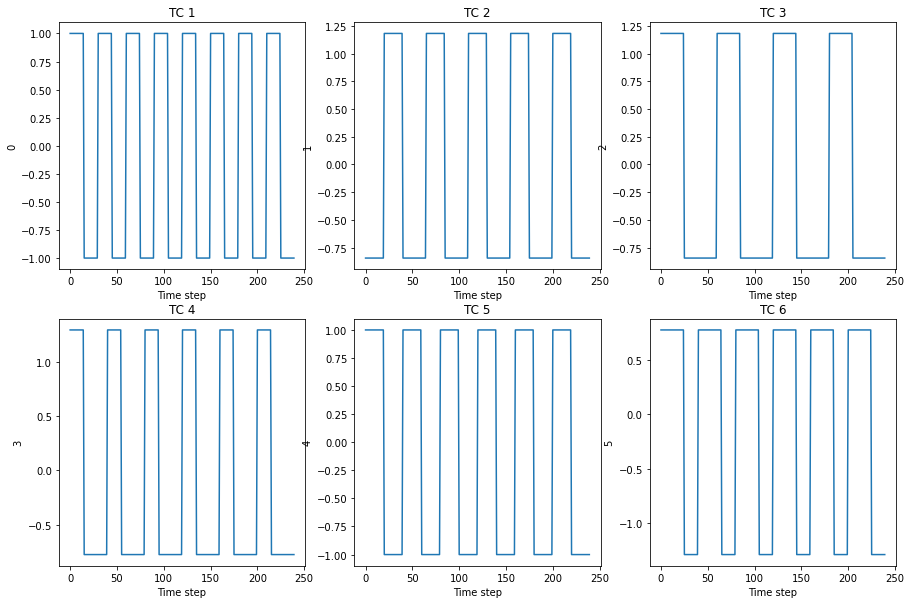

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(TC)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
for i in range(0,6):
    plot_col=i
    plot_row=0
    if (i>=3):
        plot_row = 1
        plot_col = i%3
    
    ax = sns.lineplot(x=df.index, y=df[i], ax=axs[plot_row, plot_col])
    ax.set(xlabel='Time step', title=f'TC {i+1}')
    
plt.savefig(f'./plots/TCs')
plt.show()

# TASK 1.2

[[ 1.00000000e+00  6.47630098e-18  1.69030851e-01  8.60662966e-02
   0.00000000e+00  8.60662966e-02]
 [ 6.47630098e-18  1.00000000e+00 -2.85714286e-02  1.30930734e-01
  -2.31296463e-17 -1.30930734e-01]
 [ 1.69030851e-01 -2.85714286e-02  1.00000000e+00  4.36435780e-02
  -5.08852220e-17  1.30930734e-01]
 [ 8.60662966e-02  1.30930734e-01  4.36435780e-02  1.00000000e+00
   7.74596669e-01  6.00000000e-01]
 [ 0.00000000e+00 -2.31296463e-17 -5.08852220e-17  7.74596669e-01
   1.00000000e+00  7.74596669e-01]
 [ 8.60662966e-02 -1.30930734e-01  1.30930734e-01  6.00000000e-01
   7.74596669e-01  1.00000000e+00]]


Text(0.5, 1.0, 'TC Correlation matrix')

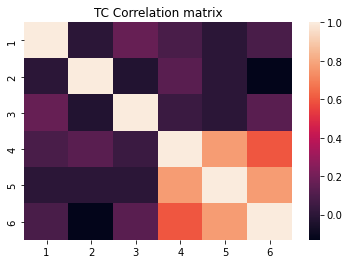

In [94]:
df = df.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6})
correlations = np.corrcoef(df, rowvar=False)
print(correlations)
labels = [1,2,3,4,5,6]
sns.heatmap(correlations, xticklabels=labels, yticklabels=labels)
plt.title("TC Correlation matrix")

# Task 1.3

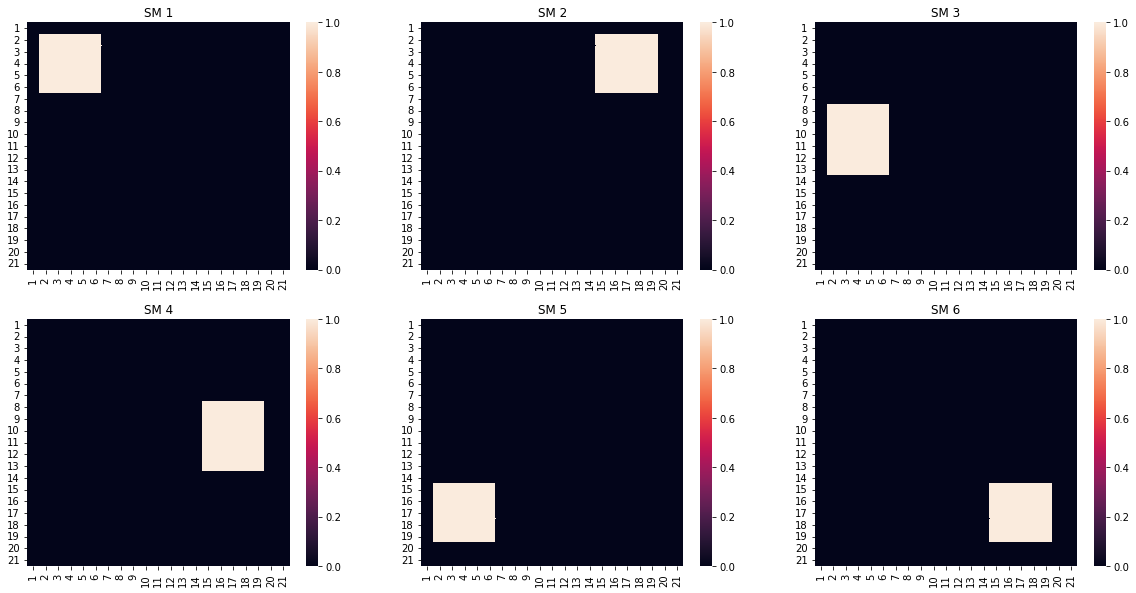

In [95]:
vert_slices = {0: [2, 6], 1: [2, 6], 2:[8,13], 3:[8,13], 4:[15,19], 5:[15,19]}
hor_slices = {0: [2, 6], 1: [15, 19], 2:[2,6], 3:[15,19], 4:[2,6], 5:[15,19]}

SM = []

fig, axs = plt.subplots(2, 3, figsize=(20,10))
for j in range(0,6):
    tmpA = np.zeros((21,21))
    vert = vert_slices[j]
    hor = hor_slices[j]

    # Ensure indexing produces same output as R would
    tmpA[vert[0]-1:vert[1], hor[0]-1:hor[1]] = 1

    plot_col=j
    plot_row=0
    if (j>=3):
        plot_row = 1
        plot_col = j%3
    ax = sns.heatmap(tmpA, yticklabels=range(1,22), xticklabels=range(1,22), ax=axs[plot_row, plot_col])
    ax.set(title=f'SM {j+1}')
    plt.title(f'SM {j+1}')
    
    SM.append(tmpA.flatten(order='F'))

plt.savefig(f'./plots/SMs')
plt.show()
SM = np.asarray(SM)
np.savetxt('data/SM.csv', SM, delimiter=',')


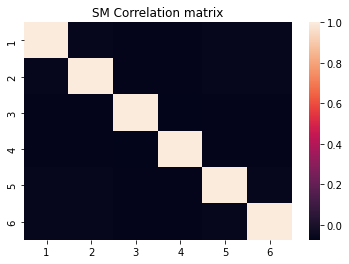

<Figure size 432x288 with 0 Axes>

In [96]:
df = np.matrix.transpose(tmpSM)
df = pd.DataFrame(df)
correlations = df.corr()

correlations
labels = range(1,7)
sns.heatmap(correlations, xticklabels=labels, yticklabels=labels)

plt.title("SM Correlation matrix")
plt.savefig(f'./plots/SM Correlation Matrix')
plt.show()
plt.clf()


# Task 1.4
Using a 6 × 6 CM for each noise type (spatial and temporal) can you show if they
are correlated across sources?

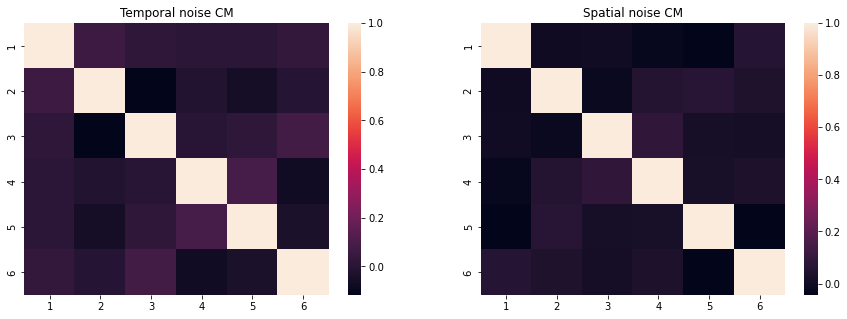

In [97]:
TC_noise = np.random.normal(scale=np.sqrt(0.25), size=(240, 6))
SM_noise = np.random.normal(scale=np.sqrt(0.015) ,size=(6, 441))

TC_noise_corr = np.corrcoef(TC_noise, rowvar=False)
SM_noise_corr = np.corrcoef(SM_noise)

fig, axs = plt.subplots(1, 2, figsize=(15,5))
ax = sns.heatmap(TC_noise_corr, yticklabels=range(1,7), xticklabels=range(1,7), ax=axs[0])
ax.set(title='Temporal noise CM')
ax = sns.heatmap(SM_noise_corr, yticklabels=range(1,7), xticklabels=range(1,7), ax=axs[1])
ax.set(title='Spatial noise CM')
plt.savefig('plots/Noise CMs')
plt.show()


Also plot the histogram of both noise sources to see if
they have a normal distribution?

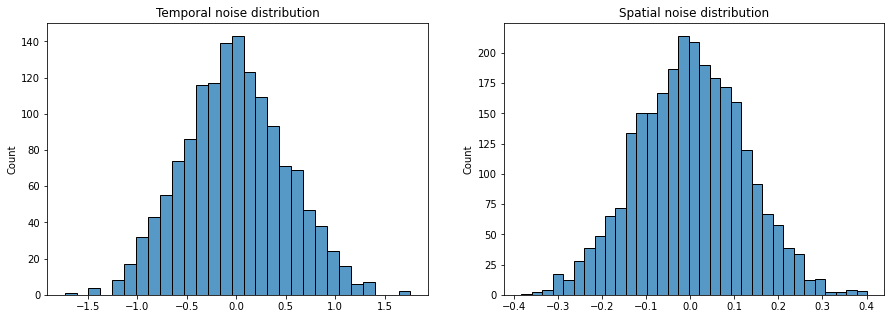

In [98]:
TC_noise_flat = TC_noise.flatten()
SM_noise_flat = SM_noise.flatten()
fig, axs = plt.subplots(1, 2, figsize=(15,5))
ax = sns.histplot(TC_noise_flat, ax=axs[0])
ax.set(title='Temporal noise distribution')

ax = sns.histplot(SM_noise_flat, ax=axs[1])
ax.set(title='Spatial noise distribution')
plt.savefig('plots/Noise histograms.png')
plt.show()

Does this normal distribution fulfils the mean and
variance= 1.96σ criteria relating to 0.25, 0.015, and zero mean? Is there product ΓtΓs
correlated across V number of variables

WHAT MEAN BBY VARIANCE=1.96????

Spatial noise mean: 0.00027248479285050034
Spatial noise variance: 0.014587773643263663
Temporal noise mean: -0.011271752405046636
Temporal noise variance: 0.2648462457766701


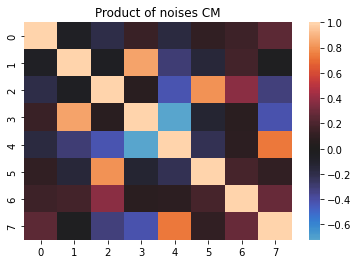

<Figure size 432x288 with 0 Axes>

In [99]:
print('Spatial noise mean:', np.mean(SM_noise_flat))
print('Spatial noise variance:',np.var(SM_noise_flat))
print('Temporal noise mean:',np.mean(TC_noise_flat))
print('Temporal noise variance:', np.var(TC_noise_flat))

product = np.matmul(TC_noise,SM_noise)
product = product[:,0:8]
product_corr = np.corrcoef(product, rowvar=False)
sns.heatmap(product_corr, center=0)
plt.title('Product of noises CM')
plt.savefig('plots/Product of noises CM')
plt.show()
plt.clf()


# Task 1.5

Generate a synthetic dataset X of size 240 × 441 as X = (TC + Γt) × (SM+ Γs). This
builds a dataset that follows the model shown in eq (1). Can these products TC × Γs
and Γt × SM exist, If yes what happened to them because if we keep them then we
cannot fit our model onto (1)? Plot atleast 100 randomly selected time-series from X
as few of them are shown in Figure 2 (left). Also plot variance of all 441 variables on
a separate plot. What information does this plot give you? At the end standardize the
dataset X, because source TCs (regressors) are also standardized and so dataset should
be too.

Sampling for lineplots

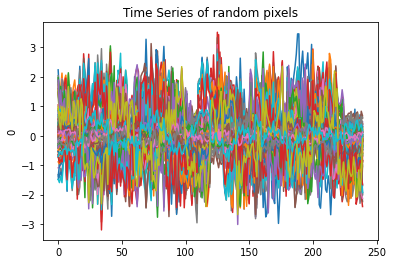

<Figure size 432x288 with 0 Axes>

In [100]:
D = np.add(TC, TC_noise)
A = np.add(tmpSM, SM_noise)

X = np.matmul(D,A)

num_samples = 100
space_choices = np.random.choice(range(0,441), size=num_samples, replace=False)
sample = X[:, space_choices]


df = pd.DataFrame(sample)
df.head()
df.columns
for j in range(0,num_samples):
    plot = sns.lineplot(x=df.index, y=df[j])
plt.title("Time Series of random pixels")
plt.savefig('plots/TimeSeries of random samples')
plt.show()



PLot variance of 441 variables

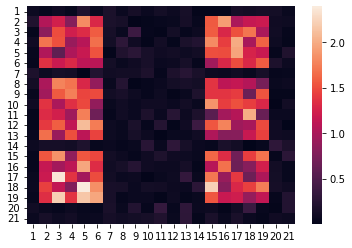

In [101]:
variances = np.var(X, axis=0)
variances = np.reshape(variances, (21,21), order='F')
variances
sns.heatmap(variances, yticklabels=range(1,22), xticklabels=range(1,22))
plt.savefig('plots/X variances.png')
plt.show()

In [102]:
X = stats.zscore(X, axis=0)
np.savetxt('data/X.csv', X, delimiter=',')